In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('Downloads\Project\winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("Downloads\Project"))

['.git', 'Decision tree.ipynb', 'kneighbour.ipynb', 'random forest.ipynb', 'svc.ipynb', 'winequality-red.csv']


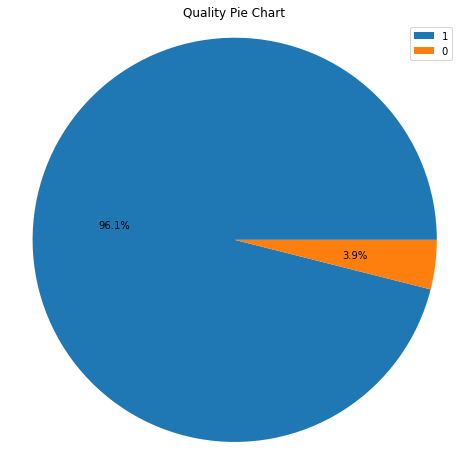

The good quality wines count is  96.1 %.


In [26]:
df['grade'] = 1 # good
df.grade[df.quality < 5] = 0 # not good

plt.figure(figsize = (8,8))
labels = df.grade.value_counts().index
plt.pie(df.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count is ',round(df.grade.value_counts(normalize=True)[1]*100,1),'%.')

In [27]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,1


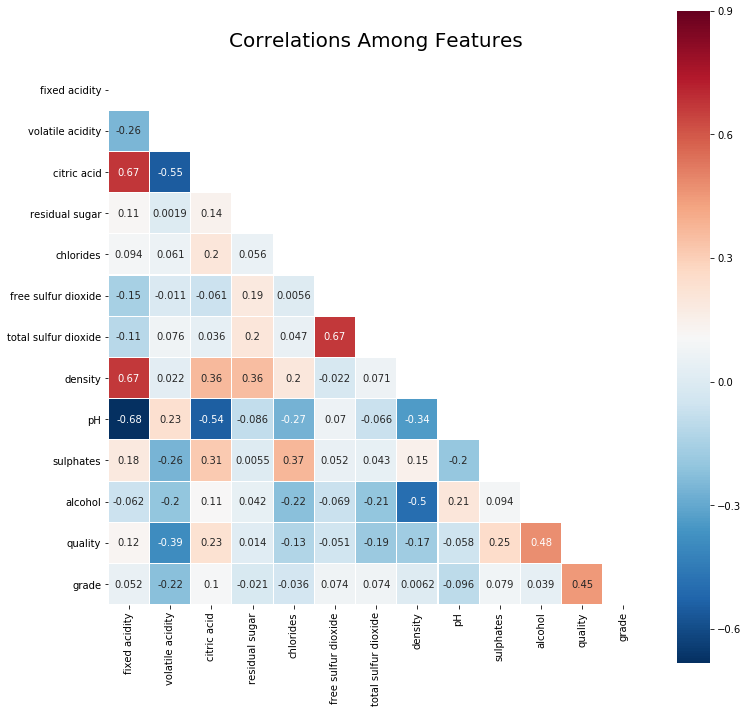

In [28]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

In [29]:
good = df[df.grade == 1]
notgood = df[df.grade == 0]

In [30]:
drop_items = ['quality','grade']
g1 = pd.DataFrame(good.drop(drop_items, axis=1).mean(), columns=['Good']).T
g2 = pd.DataFrame(notgood.drop(drop_items, axis=1).mean(), columns=['Not Good']).T
total = pd.DataFrame(df.drop(drop_items, axis=1).mean(), columns=['Total Average']).T
data = g1.append([g2, total])

In [31]:
temp1 = data.values.reshape((3, 11))
standard = data.loc['Total Average'].values.reshape((1, 11))
temp = 100* temp1 / standard
data_percentage = pd.DataFrame(temp, columns = data.columns.values.tolist())

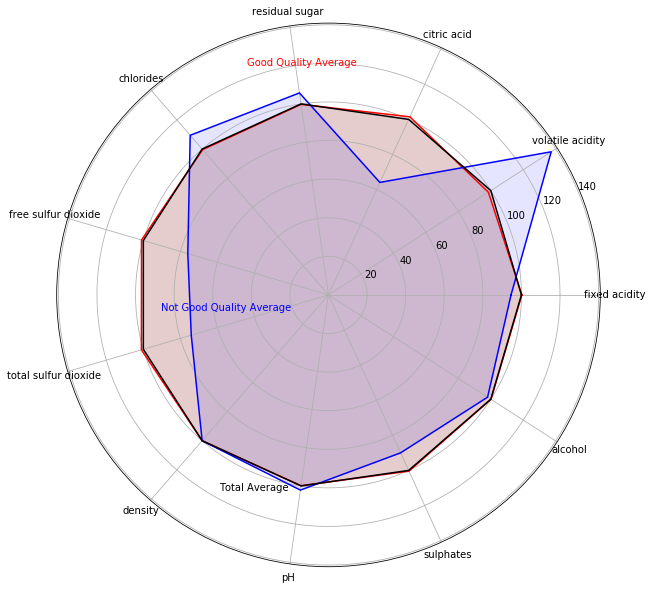

In [32]:
from math import pi
Attributes =list(data_percentage)
AttNo = len(Attributes)

values = data_percentage.iloc[0].tolist() #
values += values [:1]

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

values2 = data_percentage.iloc[1].tolist() # 
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

values3 = data_percentage.iloc[2].tolist() # 
values3 += values3 [:1]

angles3 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles3 += angles3 [:1]

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1],Attributes)

# Good 
ax.plot(angles, values, color = 'r')
ax.fill(angles, values, 'red', alpha=0.1)

# Not Good
ax.plot(angles2, values2, color = 'b')
ax.fill(angles2, values2, 'blue', alpha=0.1)

# Total Average
ax.plot(angles3, values3, color = 'black')
ax.fill(angles3, values3, 'black', alpha=0.1)

plt.figtext(0.4,0.82,'Good Quality Average',color='red')
plt.figtext(0.28,0.48,'Not Good Quality Average',color='blue')
plt.figtext(0.36,0.23,'Total Average',color='black')
plt.show()

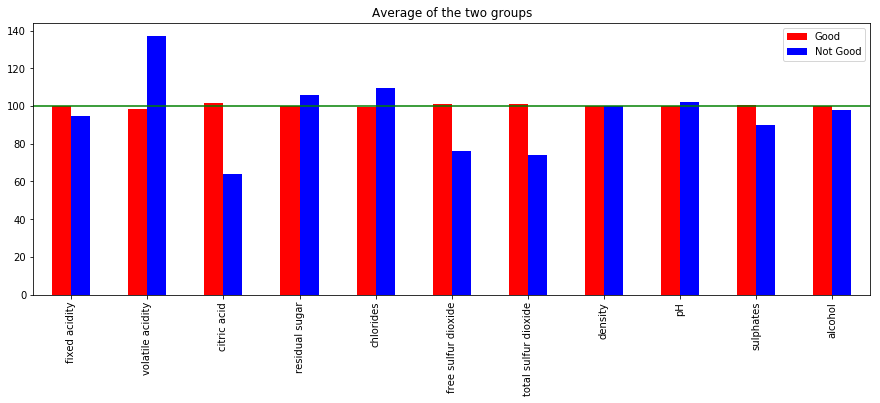

In [33]:
data_percentage[:2].T.plot(kind='bar',figsize=(15,5), color=['red','blue'])
plt.title('Average of the two groups')
plt.legend(('Good','Not Good'))
x = np.linspace(-10,100,10)
y = 100*np.ones(10)
plt.plot(x,y,'green')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
df_train_features = df.drop(['quality','grade'], axis =1)
n = 11

x_train, x_test, y_train, y_test = train_test_split(df_train_features, df['grade'], test_size=0.1, random_state=7)

x_train_mat = x_train.values.reshape((len(x_train), n))
x_test_mat = x_test.values.reshape((len(x_test), n))

In [36]:
print('Start Predicting...')
d =  DecisionTreeClassifier()
d.fit(x_train_mat,y_train)
de_pred = d.predict(x_test_mat)
de_pred


Start Predicting...


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1], dtype=int64)

In [37]:
y_test

1526    1
674     1
1508    1
58      1
1351    1
1532    1
1537    1
1076    1
351     1
1085    1
1206    1
817     1
432     1
1386    1
687     1
71      1
957     1
167     0
1022    1
1321    1
731     1
415     1
204     1
1527    1
185     1
1078    1
546     1
311     1
340     1
237     1
       ..
504     1
63      1
1198    1
760     1
378     1
1298    1
902     1
117     1
666     1
736     1
705     1
172     1
1266    1
713     1
701     1
350     1
27      1
1521    0
392     1
1047    1
1304    1
943     1
585     1
986     1
445     1
610     1
635     1
790     1
631     1
740     1
Name: grade, Length: 160, dtype: int64

In [38]:
print('Decision Tree:', accuracy_score(y_test, de_pred)*100,'%')

Decision Tree: 95.625 %


In [39]:
k = [15,21,36,45,109]
for i in k:
    rf_tune = DecisionTreeClassifier(random_state=i)
    rf_tune.fit(x_train_mat,y_train)
    y_pred = rf_tune.predict(x_test_mat)
    print(accuracy_score(y_test, y_pred)*100,'%')

95.625 %
96.25 %
95.625 %
96.25 %
96.25 %


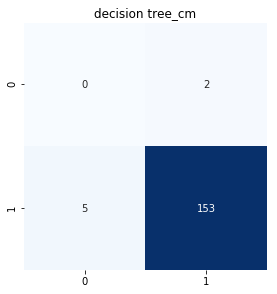

In [45]:
lr_cm=confusion_matrix(y_test,de_pred)
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("decision tree_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)


In [36]:
x_train_check = df_train_features.values.reshape((len(df_train_features), n))
x_test_check = df['grade'].values.reshape((len(df['grade']), 1))

k = [15,21,36,45,109]
for i in k:
    rf_tune = DecisionTreeClassifier(random_state=i)
    rf_tune.fit(x_train_mat,y_train)
    yy_pred = rf_tune.predict(x_train_check)
    print(accuracy_score(x_test_check, yy_pred)*100,'%')

99.56222639149468 %
99.62476547842401 %
99.56222639149468 %
99.62476547842401 %
99.62476547842401 %


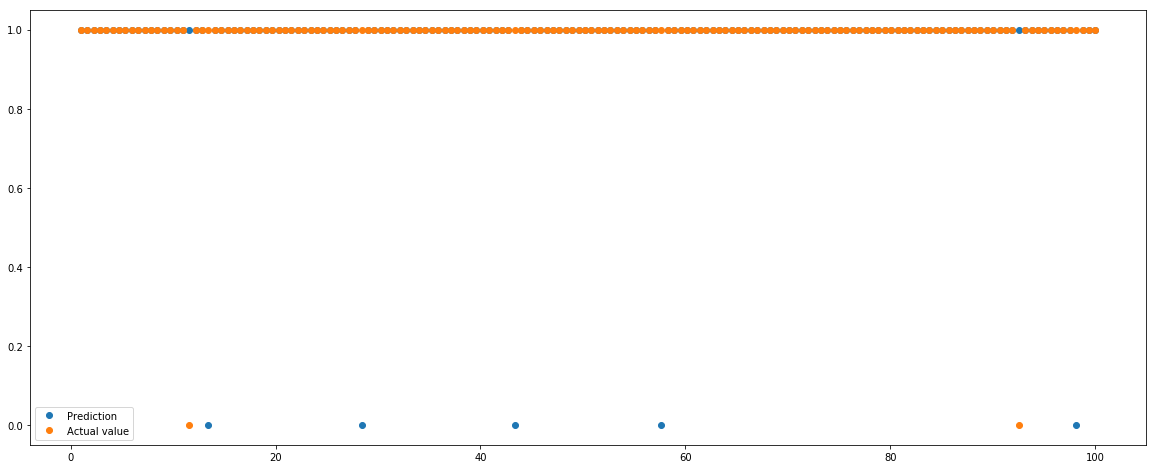

In [37]:
plt.figure(figsize = (20,8))
domain = np.linspace(1,100,len(y_pred)) 
plt.plot(domain, de_pred,'o')
plt.plot(domain, y_test,'o')
plt.legend(('Prediction','Actual value'))
plt.show()